In [185]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt

# my own class files
import with_learning.learning_NN.Receptors as Receptors
import with_learning.learning_NN.Network as Network


importlib.reload(Receptors)
importlib.reload(Network)

# import debugpy
# debugpy.listen(("0.0.0.0", 8888))  # Replace 5678 with your desired port number
# print("Debugger is ready. Attach in VS Code.")
# debugpy.wait_for_client()
# # debugpy.breakpoint()  # Optionally set a breakpoint here
# print("Debugger is attached, ready to debug.")

<module 'with_learning.learning_NN.Network' from '/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Network.py'>

In [186]:
# try use MCMC result params
path = "/home/yaning/Documents/Spiking_NN/without_learning/"
samples = np.load(path + "MCMC_samples/static_std_initial_0.npy")
cut_samples = samples[1000:, :]
values = np.mean(cut_samples, axis=0)
infer_names = Receptors.LigandGatedChannelFactory.infer_names
infer_params = dict(zip(infer_names, values))
Receptors.LigandGatedChannelFactory.infer_params = infer_params

In [187]:
pointCount = 5000
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027
# Neuron: deltaTms, I, Vm, fire times

# with learning every group has more neurons 
neuron_input_0 = Network.Neuron(deltaTms, 0, initial_Vm, "input_0", 0)
neuron_input_1 = Network.Neuron(deltaTms, 0, initial_Vm, "input_1", 0)
neuron_input_2 = Network.Neuron(deltaTms, 0, initial_Vm, "input_2", 0)

neuron_excite_main_0 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_main_0", 0)
neuron_excite_main_1 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_main_1", 0)
neuron_excite_sub_0 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_sub_0", 0)
neuron_excite_sub_1 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_sub_1", 0)

neuron_inhibit_main_0 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_main_0", 0)
neuron_inhibit_main_1 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_main_1", 0)
neuron_inhibit_sub_0 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_sub_0", 0)
neuron_inhibit_sub_1 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_sub_1", 0)

neuron_output = Network.Neuron(deltaTms, 0, initial_Vm, "output", 0)

neurons = [neuron_input_0, neuron_input_1, neuron_input_2, 
            neuron_excite_main_0, neuron_excite_main_1, 
            neuron_excite_sub_0, neuron_excite_sub_1, 
            neuron_inhibit_main_0, neuron_inhibit_main_1, 
            neuron_inhibit_sub_0, neuron_inhibit_sub_1,
            neuron_output]

neuron_names = ["input_0", "input_1", "input_2",
                "excite_main_0", "excite_main_1", 
                "excite_sub_0", "excite_sub_1",
                "inhibit_main_0", "inhibit_main_1",
                "inhibit_sub_0", "inhibit_sub_1",
                "output"]


# create synapse/connection (send neuron, receive neuron)
control = Network.Control(deltaTms, initial_Vm)



#*********************full layer***************************
# ----------------first input layer------------------------
control.create_synapse(neuron_input_0, neuron_excite_main_0, "AMPA")
control.create_synapse(neuron_input_1, neuron_excite_main_0, "AMPA")
control.create_synapse(neuron_input_2, neuron_excite_main_0, "AMPA")

control.create_synapse(neuron_input_0, neuron_excite_main_1, "AMPA")
control.create_synapse(neuron_input_1, neuron_excite_main_1, "AMPA")
control.create_synapse(neuron_input_2, neuron_excite_main_1, "AMPA")

control.create_synapse(neuron_input_0, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_input_1, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_input_2, neuron_inhibit_main_0, "GABA")

control.create_synapse(neuron_input_0, neuron_inhibit_main_1, "GABA")
control.create_synapse(neuron_input_1, neuron_inhibit_main_1, "GABA")
control.create_synapse(neuron_input_2, neuron_inhibit_main_1, "GABA")

# ----------------self recurrent layer----------------
control.create_synapse(neuron_excite_main_0, neuron_excite_sub_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_0, neuron_excite_sub_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_main_1, neuron_excite_sub_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_1, neuron_excite_sub_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_sub_0, neuron_excite_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_sub_0, neuron_excite_main_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_sub_1, neuron_excite_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_sub_1, neuron_excite_main_1, "AMPA+NMDA")
    

control.create_synapse(neuron_inhibit_main_0, neuron_inhibit_sub_0, "GABA")
control.create_synapse(neuron_inhibit_main_0, neuron_inhibit_sub_1, "GABA")

control.create_synapse(neuron_inhibit_main_1, neuron_inhibit_sub_0, "GABA")
control.create_synapse(neuron_inhibit_main_1, neuron_inhibit_sub_1, "GABA")

control.create_synapse(neuron_inhibit_sub_0, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_inhibit_sub_0, neuron_inhibit_main_1, "GABA")

control.create_synapse(neuron_inhibit_sub_1, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_inhibit_sub_1, neuron_inhibit_main_1, "GABA")

# --------------between excitatory and inhibitory----------------
control.create_synapse(neuron_excite_main_0, neuron_inhibit_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_0, neuron_inhibit_main_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_main_1, neuron_inhibit_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_1, neuron_inhibit_main_1, "AMPA+NMDA")

control.create_synapse(neuron_inhibit_main_0, neuron_excite_main_0, "GABA")
control.create_synapse(neuron_inhibit_main_0, neuron_excite_main_1, "GABA")

control.create_synapse(neuron_inhibit_main_1, neuron_excite_main_0, "GABA")
control.create_synapse(neuron_inhibit_main_1, neuron_excite_main_1, "GABA")

# ----------------output layer----------------------
control.create_synapse(neuron_excite_main_0, neuron_output, "AMPA")
control.create_synapse(neuron_excite_main_1, neuron_output, "AMPA")




# recording arrays
Vm_neuron_output = []
GABA_gPs = []

# run
for t in range(pointCount):

    # simulate input neuron firing
    # this step changes states of the receptors
    if t >= 2000 and t <= 2290:
        neuron_input_0.sending_signal()
    

    # update the synapse states then each neuron
    for neuron in neurons:
        neuron.check_firing(t)
        neuron.update()
        
    # set the synapse states back to 0
    for synapse in control.all_synapses:
        synapse.state = 0


    Vm_neuron_output.append(neuron_excite_main_0.Vm - 70)
    

        




In [188]:
for synapse in control.all_synapses:
    for receptor in synapse.receptors:
        print(receptor.w)

785752.6473412353
790946.0418501261
796139.4363590168
862947.2430920034
868352.1376008939
873757.0321097851
283.9478618824093
294.81496115825627
305.68206043410316
530.4696654696755
547.3367647455224
564.2038640213693
12.399122344790179
10.315831349575653
12.399122344790179
10.315831349575653
12.399122344790179
10.315831349575653
12.399122344790179
10.315831349575653
801332.8308679074
1290432.4378384752
879161.9266186754
1415297.3910397042
811719.6198856889
1307051.300266926
889971.7156364569
1432593.053468154
41265.888011657975
45241.05558564008
42446.500606913156
46470.66818089527
316.5491597099501
581.0709632972163
327.41625898579707
597.9380625730632
337.8214168826408
548.3788614514917
614.343220469907
1000.4137471911176
359.55561543433464
583.1535791342019
648.0774190216009
1054.3884648738278
822106.8708448494
900781.9665956174
827300.2653537401
906186.8611045082
12.399122344790179
12.399122344790179


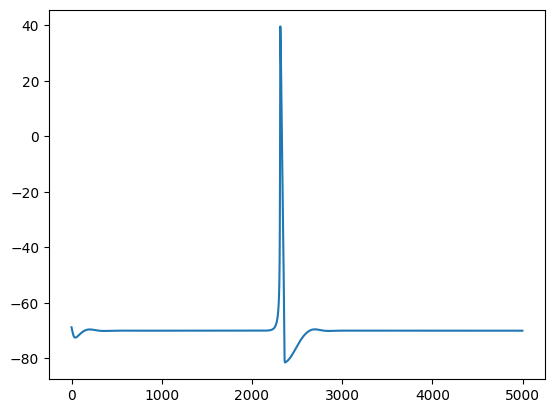

In [189]:
# plt.plot(times, leak_currents, label="leaky")
# plt.plot(times/deltaTms, Ina_currents)
# plt.plot(times/deltaTms, Ik_currents)
# plt.plot(times/deltaTms, Vm_neuron1)
# plt.plot(GABA_gPs)
plt.plot(Vm_neuron_output)
# plt.plot(times/deltaTms, ampa_currents, label = "ampa")


# plt.xlim(1900, 6250)
# plt.legend()

In [190]:
type(Vm_neuron_output)

list

In [191]:
firing = []
for i in Vm_neuron_output:
    if i >= -50:
        firing.append(i)

In [192]:
len(firing)

47

In [193]:
np.max(Vm_neuron_output)

39.60564374757415

NameError: name 'Vm_neuron1' is not defined

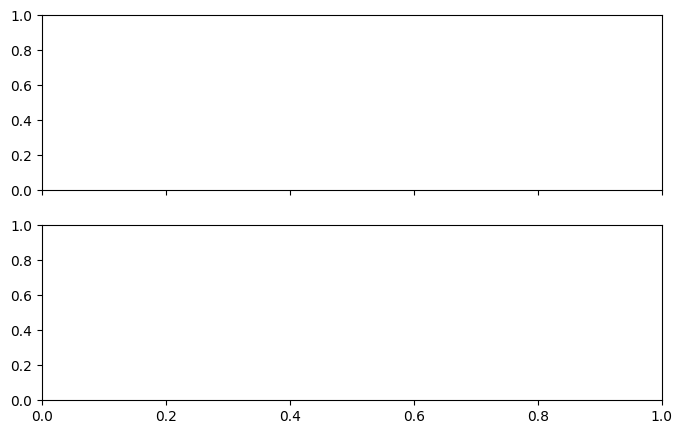

In [194]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [1, 1]})

ax1.plot(times, Vm_neuron1, label = '1')
ax1.plot(times, Vm_neuron2, label = '2')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

# ax1.set_ylim(0, 1)


ax2.plot(times, I_neuron1, label = '1')
ax2.plot(times, I_neuron2, label = '2')
ax2.set_ylabel("Currents (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax2.set_ylim(-1,1)
# plt.xlim(98, 120)
plt.margins(0, 0.1)
plt.tight_layout()
plt.legend()
plt.show()

# sharp wave ripples